In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import torchvision
from torchvision import transforms, datasets
import numpy as np
import pandas as pd
import joblib

In [3]:
#!pip install torchvision

In [4]:
features = pd.read_csv('C:/Users/ratne/Downloads/digit-recognizer/train.csv').drop('label',axis=1)
features.head(5)

scaler = StandardScaler()
df_x = torch.tensor(scaler.fit_transform(features))
joblib.dump(scaler,"scaler.joblib")

['scaler.joblib']

In [5]:
df_y = torch.tensor(pd.read_csv('C:/Users/ratne/Downloads/digit-recognizer/train.csv')['label'].values)
train_tensor = torch.utils.data.TensorDataset(df_x,df_y)
trainset = torch.utils.data.DataLoader(train_tensor,shuffle=True,batch_size=20)

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64,dtype=torch.float64)
        self.fc2 = nn.Linear(64,64,dtype=torch.float64)
        self.fc3 = nn.Linear(64,64,dtype=torch.float64)
        self.fc4 = nn.Linear(64,10,dtype=torch.float64)

    def Forward_Prop(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.log_softmax(self.fc4(X),dim=1)
        return X

In [7]:
net = Net()
optimizer = optim.Adam(net.parameters(),lr=0.001)

alpha = 3

for epoch in range(alpha):
    for data in trainset:
        X,Y = data
        # print(X.view((-1,28*28)))
        # print(Y)
        # break
        net.zero_grad()
        output = net.Forward_Prop(X.view((-1,28*28)))
        loss = F.nll_loss(output,Y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.4456, dtype=torch.float64, grad_fn=<NllLossBackward0>)
tensor(0.0035, dtype=torch.float64, grad_fn=<NllLossBackward0>)
tensor(0.1450, dtype=torch.float64, grad_fn=<NllLossBackward0>)


In [8]:
scaler = joblib.load('scaler.joblib')
testset = scaler.transform(pd.read_csv('C:/Users/ratne/Downloads/digit-recognizer/test.csv'))
print(testset)
testset = torch.tensor(testset)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


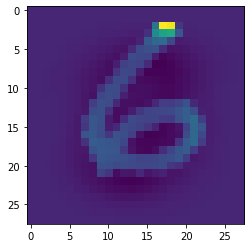

The given Image is number : 6


In [28]:
i = 3041
import matplotlib.pyplot as plt
plt.imshow(testset[i].view(28,28))
plt.show()
#print(testset[i])

print("The given Image is number : {}".format(torch.argmax(net.Forward_Prop(testset[i].view(-1,28*28))).item()))

In [30]:
#print(pd.read_csv('C:/Users/ratne/Downloads/digit-recognizer/test.csv'))

In [31]:
from PIL import Image


In [115]:
im = Image.open('C:/Users/ratne/Downloads/Untitled68.jpg', 'r')
newsize = (28,28)
im.resize(newsize)
im=im.convert('1')
#im.show()
#im=im.resize(newsize)


In [116]:
pix_val = list(im.getdata())
print(len(pix_val))

784


In [117]:
import pandas
real={}

for iom in range(0,784):
    
    hey="pixel"+str(iom)
    lissst=[]
    lissst.append(pix_val[iom])
    real[hey]=lissst
#print(real)    
df=pandas.DataFrame(real)
#print(df)

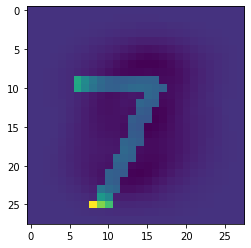

In [118]:
import torch
#testset = scaler.transform(df)
#print(df)
dff = scaler.transform(df)
dff = torch.tensor(dff)
plt.imshow(dff.view(28,28))
plt.show()


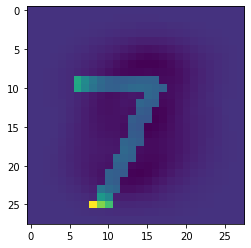

The given Image is number : 7


In [119]:
import matplotlib.pyplot as plt
plt.imshow(dff.view(28,28))
plt.show()
#print(dff)
print("The given Image is number : {}".format(torch.argmax(net.Forward_Prop(dff[0].view(-1,28*28))).item()))

In [27]:
print("The given Image is number : {}".format(torch.argmax(net.Forward_Prop(testset[i].view(-1,28*28))).item()))

The given Image is number : 1
